In [2]:
!pip install streamlit
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [2]:
# read traning data
df = pd.read_csv('train_electricity.csv', index_col='Date')
df.head(5)

,Consumption_MW,Coal_MW,Gas_MW,Hidroelectric_MW,Nuclear_MW,Wind_MW,Solar_MW,Biomass_MW,Production_MW
Date,,,,,,,,,
1262487660,5302.0,1754.0,1144.0,1391.0,706.0,0.0,0.0,0.0,4995.0
1262488200,5318.0,1777.0,1145.0,1468.0,708.0,0.0,0.0,0.0,5097.0
1262488800,5268.0,1743.0,1139.0,1361.0,708.0,0.0,0.0,0.0,4951.0
1262489400,5358.0,1759.0,1142.0,1449.0,707.0,0.0,0.0,0.0,5057.0
1262490060,5327.0,1764.0,1142.0,1417.0,709.0,0.0,0.0,0.0,5031.0


In [3]:
from datetime import datetime
ts = [int(d) for d in df.index]

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case

print(datetime.utcfromtimestamp(ts[0]).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(ts[1]).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(ts[2]).strftime('%Y-%m-%d %H:%M:%S'))

2010-01-03 03:01:00
2010-01-03 03:10:00
2010-01-03 03:20:00


In [4]:
day_ts = [datetime.utcfromtimestamp(t).strftime('%Y-%m-%d') for t in ts]
df['Day'] = day_ts

In [5]:
df_new = df.groupby('Day').sum()
df_new

,Consumption_MW,Coal_MW,Gas_MW,Hidroelectric_MW,Nuclear_MW,Wind_MW,Solar_MW,Biomass_MW,Production_MW
Day,,,,,,,,,
2010-01-03,874810.0,347240.0,153451.0,284290.0,87668.0,0.0,0.0,0.0,872639.0
2010-01-04,933653.0,262921.0,93664.0,372362.0,203503.0,0.0,0.0,0.0,932485.0
2010-01-05,765805.0,240812.0,34818.0,275409.0,205383.0,0.0,0.0,0.0,756438.0
2010-01-06,879815.0,366273.0,25326.0,405128.0,99650.0,0.0,0.0,0.0,896343.0
2010-01-07,883756.0,330657.0,40238.0,385101.0,200889.0,3813.0,0.0,0.0,960675.0
...,...,...,...,...,...,...,...,...,...
2017-12-30,990717.0,265775.0,222486.0,245874.0,205045.0,86549.0,6443.0,4954.0,1037076.0
2017-12-31,942634.0,241549.0,202973.0,192147.0,203591.0,145302.0,4934.0,4502.0,994966.0
2018-01-01,844500.0,222659.0,166553.0,195694.0,203426.0,63707.0,11358.0,4086.0,867443.0


In [11]:
df_new.index.name = 'Date'
df_new

,Consumption_MW,Coal_MW,Gas_MW,Hidroelectric_MW,Nuclear_MW,Wind_MW,Solar_MW,Biomass_MW,Production_MW
Date,,,,,,,,,
2010-01-03,874810.0,347240.0,153451.0,284290.0,87668.0,0.0,0.0,0.0,872639.0
2010-01-04,933653.0,262921.0,93664.0,372362.0,203503.0,0.0,0.0,0.0,932485.0
2010-01-05,765805.0,240812.0,34818.0,275409.0,205383.0,0.0,0.0,0.0,756438.0
2010-01-06,879815.0,366273.0,25326.0,405128.0,99650.0,0.0,0.0,0.0,896343.0
2010-01-07,883756.0,330657.0,40238.0,385101.0,200889.0,3813.0,0.0,0.0,960675.0
...,...,...,...,...,...,...,...,...,...
2017-12-30,990717.0,265775.0,222486.0,245874.0,205045.0,86549.0,6443.0,4954.0,1037076.0
2017-12-31,942634.0,241549.0,202973.0,192147.0,203591.0,145302.0,4934.0,4502.0,994966.0
2018-01-01,844500.0,222659.0,166553.0,195694.0,203426.0,63707.0,11358.0,4086.0,867443.0


In [6]:
cols = ['Coal_MW', 'Gas_MW', 'Hidroelectric_MW', 'Nuclear_MW', 'Wind_MW', 'Solar_MW', 'Biomass_MW']
print(cols)

['Coal_MW', 'Gas_MW', 'Hidroelectric_MW', 'Nuclear_MW', 'Wind_MW', 'Solar_MW', 'Biomass_MW']


<Figure size 432x288 with 0 Axes>

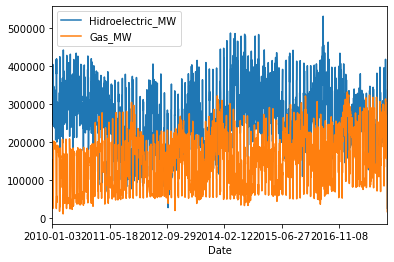

In [12]:
fig = plt.figure()
df_new[[cols[2], cols[1]]].plot()

In [13]:
df_new.to_csv('daily_electricity.csv')